# *Defect Analysis Project-EDA*

This notebook explores the defect dataset to understand defect types, severity levels, inspection methods, and associated repair costs.

## Importing Libraries:

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing & Inspecting Data:

In [101]:
df = pd.read_csv('defects_data.csv')
df['defect_date'] = pd.to_datetime(df['defect_date'])
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64


In [102]:
df.duplicated().sum()

0

In [103]:
df.isnull().sum()

defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64

#### Dataset Information

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   defect_id          1000 non-null   int64         
 1   product_id         1000 non-null   int64         
 2   defect_type        1000 non-null   object        
 3   defect_date        1000 non-null   datetime64[ns]
 4   defect_location    1000 non-null   object        
 5   severity           1000 non-null   object        
 6   inspection_method  1000 non-null   object        
 7   repair_cost        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


#### Descriptive Statistics

The summary statistics for numerical column (repair_cost).


In [105]:
df[['repair_cost']].describe().round(2)

,repair_cost
count,1000.00
mean,507.63
std,289.62
min,10.22
25%,270.90
50%,506.43
75%,759.06
max,999.64


## Exploring & Analysing Data:

In [106]:
df.sample(10)

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
197,198,28,Cosmetic,2024-04-14,Surface,Minor,Manual Testing,561.27
49,50,9,Functional,2024-01-06,Component,Moderate,Manual Testing,572.08
235,236,29,Cosmetic,2024-05-05,Surface,Minor,Automated Testing,47.99
495,496,6,Functional,2024-01-16,Internal,Critical,Visual Inspection,533.14
426,427,10,Structural,2024-03-22,Surface,Critical,Manual Testing,342.61
826,827,96,Cosmetic,2024-01-19,Component,Minor,Manual Testing,904.55
788,789,54,Structural,2024-01-21,Surface,Minor,Automated Testing,331.32
752,753,83,Cosmetic,2024-01-08,Surface,Critical,Visual Inspection,140.96
754,755,90,Cosmetic,2024-01-01,Component,Critical,Manual Testing,317.50
765,766,49,Cosmetic,2024-04-06,Component,Moderate,Visual Inspection,305.36


In [107]:
# Types of defects 
df['defect_type'].unique()

array(['Structural', 'Functional', 'Cosmetic'], dtype=object)

In [108]:
# The number of occurrences of each type of defect
df['defect_type'].value_counts()

Structural    352
Functional    339
Cosmetic      309
Name: defect_type, dtype: int64

In [109]:
# Defect locations 
df['defect_location'].unique()

array(['Component', 'Internal', 'Surface'], dtype=object)

In [110]:
#The number of times each defect location appears
df['defect_location'].value_counts()

Surface      353
Component    326
Internal     321
Name: defect_location, dtype: int64

In [111]:
# Severity levels
df['severity'].unique()

array(['Minor', 'Critical', 'Moderate'], dtype=object)

In [112]:
#The number of defects that fall under each severity level
df['severity'].value_counts()

Minor       358
Critical    333
Moderate    309
Name: severity, dtype: int64

In [113]:
# Inspection method
df['inspection_method'].unique()

array(['Visual Inspection', 'Automated Testing', 'Manual Testing'],
      dtype=object)

In [114]:
# The number of defects detected using each inspection method
df['inspection_method'].value_counts()

Manual Testing       352
Visual Inspection    351
Automated Testing    297
Name: inspection_method, dtype: int64

In [115]:
# Products_id with the highest number of defects
df['product_id'].value_counts().head()

81    20
63    20
97    19
56    18
4     16
Name: product_id, dtype: int64

In [116]:
# The product_id that cost the most to repair
df.groupby('product_id')['repair_cost'].sum().sort_values(ascending=False).head()

product_id
81    11740.64
10    10084.92
56     9916.30
45     9532.36
63     9174.06
Name: repair_cost, dtype: float64

In [117]:
# The proportion of critical defects out of the total defects
(df['severity'].value_counts(normalize=True)['Critical'] * 100).round(2)

33.3

In [118]:
# Rate of defects detected automatically
(df['inspection_method'].value_counts(normalize=True)['Automated Testing'] * 100).round(2)

29.7

In [119]:
# Repair cost according to the inspection method used
df.groupby('inspection_method')['repair_cost'].mean().sort_values(ascending=False)

inspection_method
Manual Testing       526.074687
Automated Testing    501.804310
Visual Inspection    494.054074
Name: repair_cost, dtype: float64

In [120]:
# The relationship between the level of risk and cost
df['severity_score'] = df['severity'].map({'Minor':1, 'Moderate':2, 'Critical':3})
df[['severity_score', 'repair_cost']].corr()

,severity_score,repair_cost
severity_score,1.00000,-0.01256
repair_cost,-0.01256,1.00000


In [121]:
# Types of defects (defect_type) that cause the highest total repair cost
df.groupby('defect_type')['repair_cost'].sum().sort_values(ascending=False)

defect_type
Structural    176923.85
Functional    171905.58
Cosmetic      158797.72
Name: repair_cost, dtype: float64

In [122]:
# Locations (defect_location) causing the most critical failures
df[df['severity'] == 'Critical']['defect_location'].value_counts()

Internal     115
Surface      115
Component    103
Name: defect_location, dtype: int64

## Data visualisation:

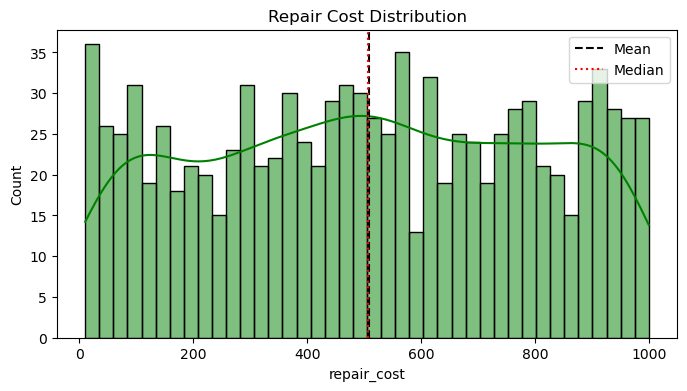

In [123]:
# 1. Histogram + KDE for repair_cost
plt.figure(figsize=(8,4))
sns.histplot(df['repair_cost'], bins=40, kde=True, color='green')
plt.axvline(df['repair_cost'].mean(), color='black', linestyle='--', label='Mean')
plt.axvline(df['repair_cost'].median(), color='red', linestyle=':', label='Median')
plt.legend()

plt.title("Repair Cost Distribution")
plt.xlabel("repair_cost")
plt.show()

C:\Users\Gogo\AppData\Local\Temp\ipykernel_6280\1574924565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='severity', y='repair_cost', data=df, palette='coolwarm', order=['Minor','Moderate','Critical'])


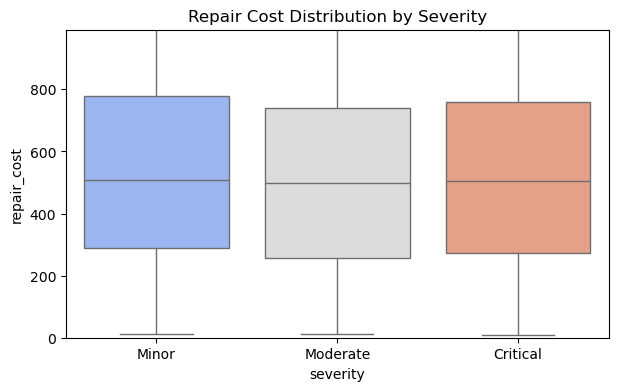

In [124]:
# 2. Boxplot: repair_cost by severity 
plt.figure(figsize=(7,4)) 
sns.boxplot(x='severity', y='repair_cost', data=df, palette='coolwarm', order=['Minor','Moderate','Critical'])
plt.title("Repair Cost Distribution by Severity")
plt.ylim(0, df['repair_cost'].quantile(0.99)) 
plt.show()

C:\Users\Gogo\AppData\Local\Temp\ipykernel_6280\3661504814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette='coolwarm')


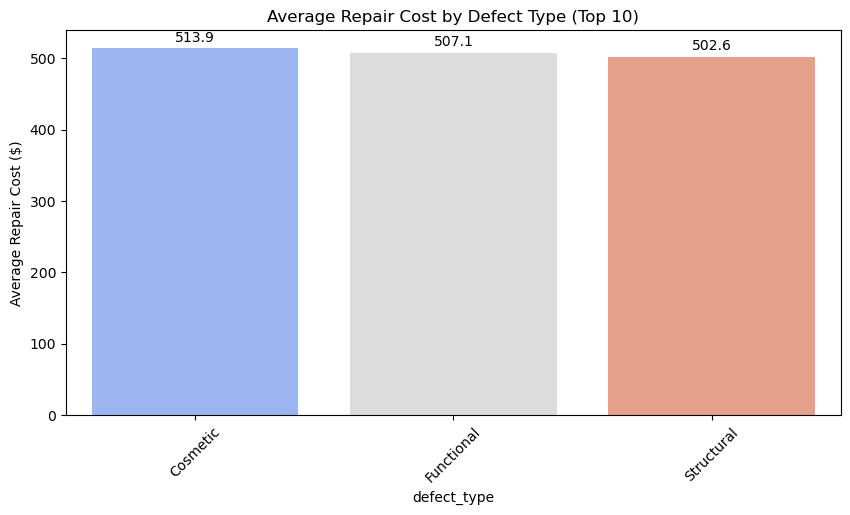

In [125]:
# 3. Avg repair_cost by defect_type 
top_types = df['defect_type'].value_counts().head(10).index
means = df[df['defect_type'].isin(top_types)].groupby('defect_type')['repair_cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=means.index, y=means.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Average Repair Cost by Defect Type (Top 10)")
plt.ylabel("Average Repair Cost ($)")
for i, v in enumerate(means.values):
    plt.text(i, v + 10, f"{v:.1f}", ha='center')
plt.show()

C:\Users\Gogo\AppData\Local\Temp\ipykernel_6280\3887250589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='defect_type', data=df, order=top_types, palette='Blues_r')


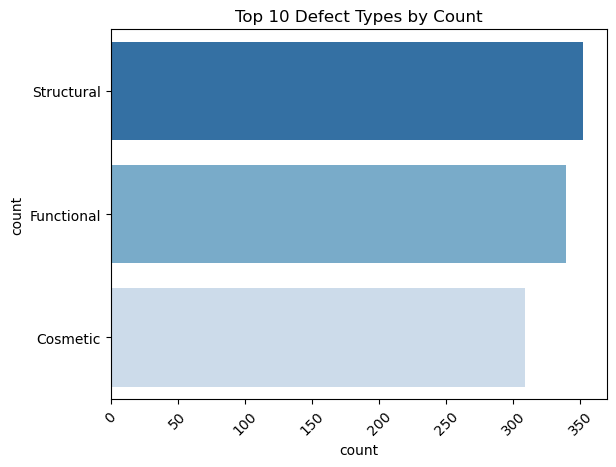

In [126]:
# 4. Frequency of defect_type 
sns.countplot(y='defect_type', data=df, order=top_types, palette='Blues_r')
plt.title("Top 10 Defect Types by Count")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Gogo\AppData\Local\Temp\ipykernel_6280\4174769489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='inspection_method', y='repair_cost', data=df, estimator='mean', order=df.groupby('inspection_method')['repair_cost'].mean().sort_values(ascending=False).index


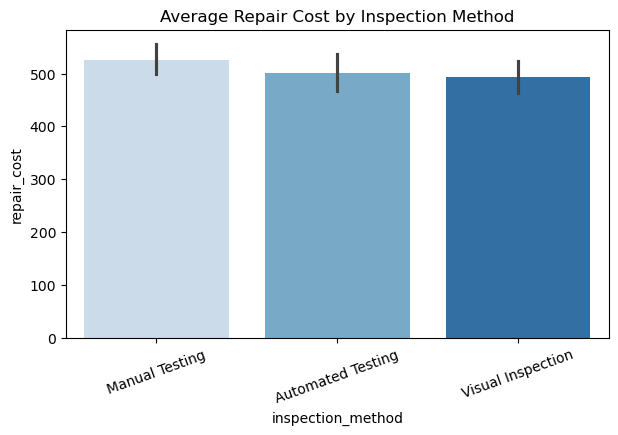

In [134]:
# 6. Avg repair_cost by inspection_method
plt.figure(figsize=(7,4))
sns.barplot(x='inspection_method', y='repair_cost', data=df, estimator='mean', order=df.groupby('inspection_method')['repair_cost'].mean().sort_values(ascending=False).index
,palette='Blues')
plt.xticks(rotation=20)
plt.title("Average Repair Cost by Inspection Method")
plt.show()

Text(0, 0.5, '')

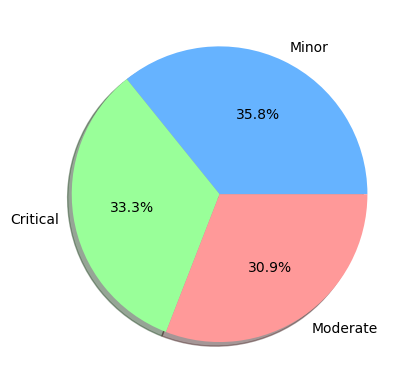

In [136]:
# 7. Pie chart: severity distribution
colors = ['#66b3ff','#99ff99','#ff9999']
df['severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, shadow=True)
plt.ylabel('')


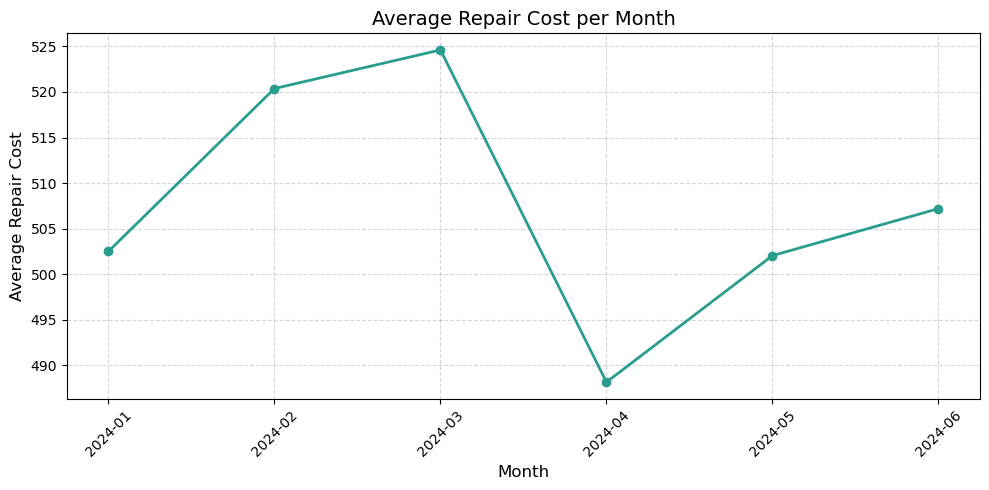

In [138]:
# 8. Line chart: avg repair_cost over months
df['month'] = df['defect_date'].dt.to_period('M')

monthly_avg = df.groupby('month')['repair_cost'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, 
         color='#2A9D8F', marker='o', linewidth=2)

plt.title("Average Repair Cost per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Repair Cost", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
df.to_csv("cleaned_defects.csv", index=False)

### Summary Insights

- The dataset contains **1000 defect records** with **no missing values**.  
- The **average repair cost** is around **$507.6**.  
- **Manual Testing** tends to have the **highest average repair cost** among all inspection methods.  
- There is **no strong correlation** between numerical fields (defect_id, product_id, repair_cost).  
- These insights can be used to optimize testing methods and reduce defect-related expenses.
